In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from skimage.measure import label, regionprops, find_contours

from skimage.exposure import rescale_intensity

from skimage.morphology import skeletonize

from skimage.filters import gaussian

In [2]:
def pad_image(image):
    padded = np.zeros(shape=(image.shape[0]+2, image.shape[1]+2), dtype = np.uint16)
    padded[1:image.shape[0]+1, 1:image.shape[1]+1] = image
    return padded

def check_branch(image, x, y):
    VAL = 0
    for i in (x-1, x, x+1):
        for j in (y-1, y, y+1):
            if (i == x) and (j == y):
                continue
            else:
                VAL += image[i, j]
    if VAL > 2:
        return True
    else:
        return False
    
def checker(tube):
    x, y = tube.shape
    for i in range(1, x-1):
        for j in range(1, y-1):
            if tube[i, j] and check_branch(tube, i, j):
                return True
    return False

def dist(x1, y1, x2, y2):
    return np.sqrt((x1-x2)**2+(y1-y2)**2)

def contour_length(data):
    val = 0
    for i in range(len(data)):
        if i != len(data) - 1:
            val += dist(data[i, 0], data[i, 1], data[i+1, 0], data[i+1, 1])
    return (val/2) # 1 pixel = 0.17 um

In [3]:
img1 = plt.imread('../Sample Data/3A.tif')

img2 = plt.imread('../Sample Data/3B.tif')

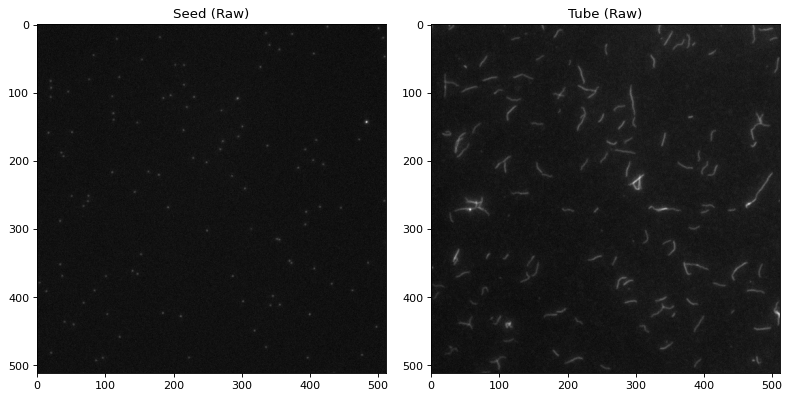

In [4]:
fig = plt.figure(figsize=(10, 5), dpi = 80)

plt.subplot(1, 2, 1)
plt.title("Seed (Raw)")
plt.imshow(img1, cmap="gray")

plt.subplot(1, 2, 2)
plt.title("Tube (Raw)")
plt.imshow(img2, cmap="gray")

plt.tight_layout()
plt.show()

## Extract tubes

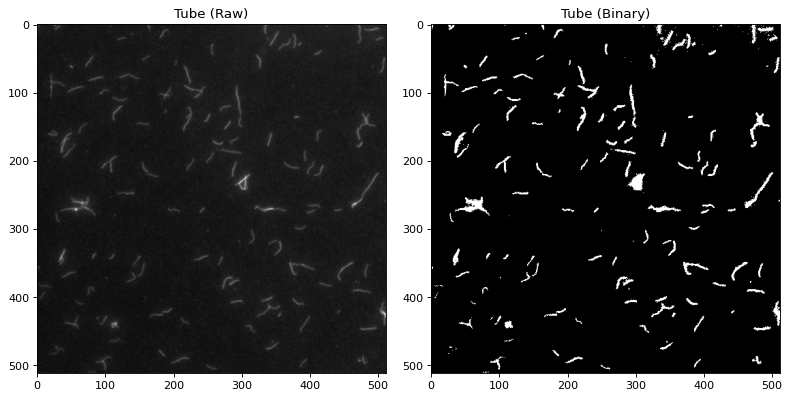

In [5]:
binary = img2 > (img2.mean() + 2*img2.std())

fig = plt.figure(figsize=(10, 5), dpi = 80)

plt.subplot(1, 2, 1)
plt.title("Tube (Raw)")
plt.imshow(img2, cmap="gray")

plt.subplot(1, 2, 2)
plt.title("Tube (Binary)")
plt.imshow(binary, cmap="gray")

plt.tight_layout()
plt.show()

In [6]:
# use labeling function to identify connected blobs
label_im = label(binary)
tube_lists = regionprops(label_im)
tube_lists = [i for i in tube_lists if i.area > 10]

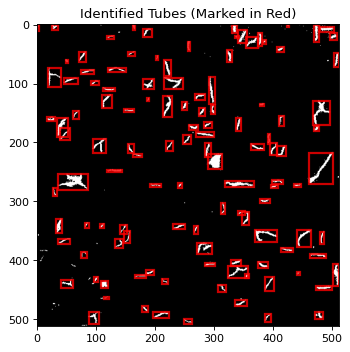

In [8]:
fig = plt.figure(figsize=(5, 5), dpi = 80)

ax = plt.subplot(1, 1, 1)
plt.title("Identified Tubes (Marked in Red)")
ax.imshow(binary, cmap="gray")
for i in tube_lists:
    minr, minc, maxr, maxc = i.bbox
    rect = plt.Rectangle((minc, minr), maxc - minc, maxr - minr,
                              fill=False, edgecolor='red', linewidth=2, alpha=.8)
    ax.add_patch(rect)
    
plt.show()

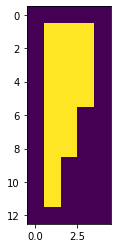

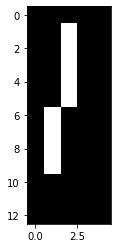

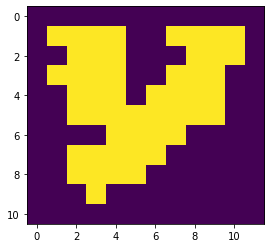

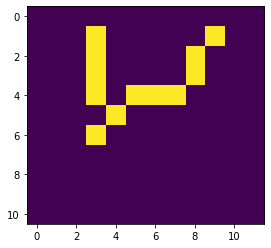

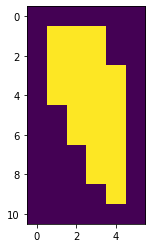

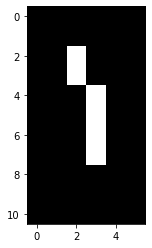

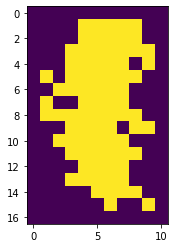

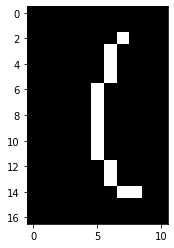

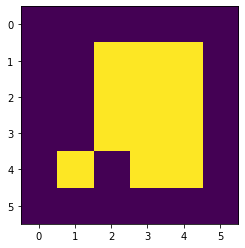

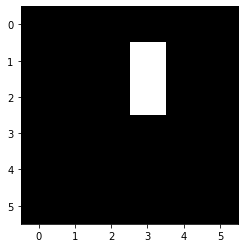

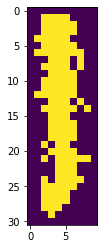

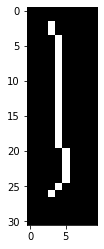

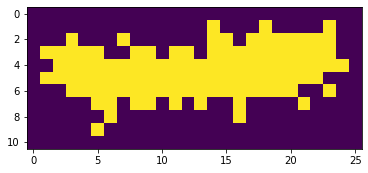

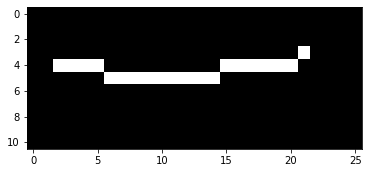

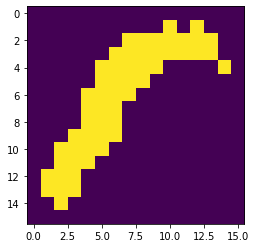

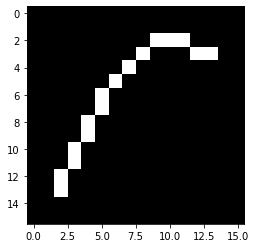

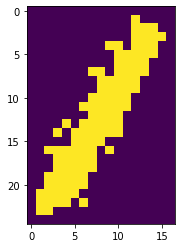

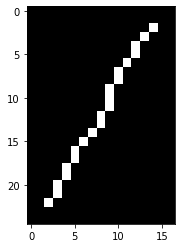

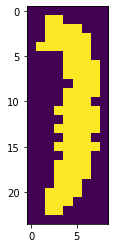

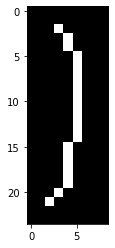

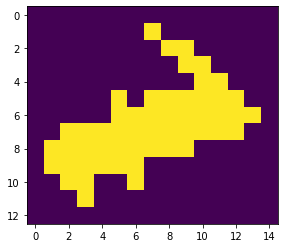

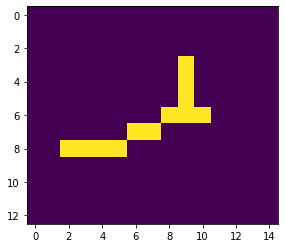

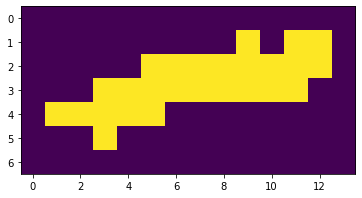

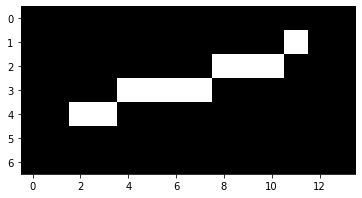

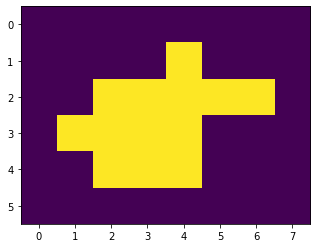

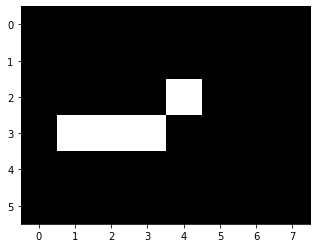

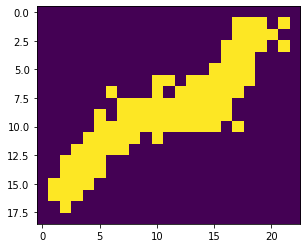

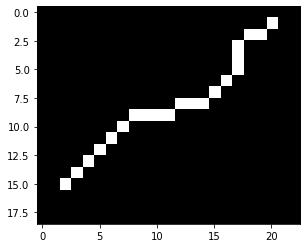

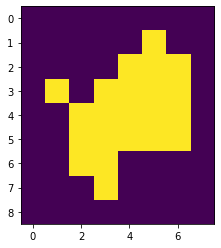

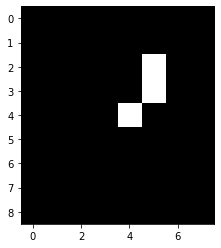

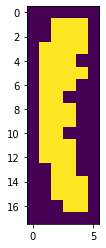

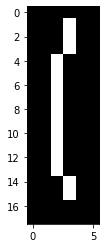

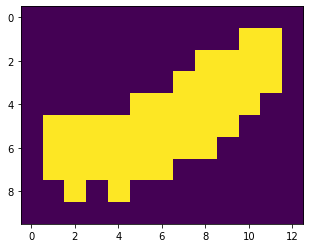

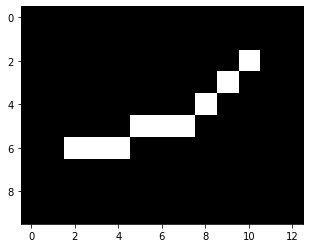

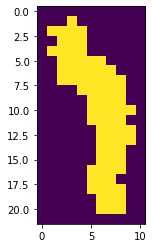

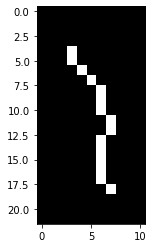

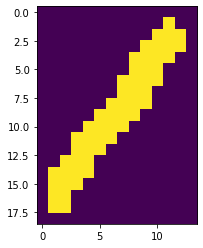

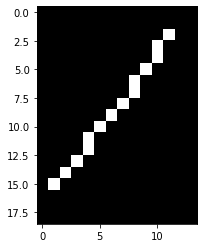

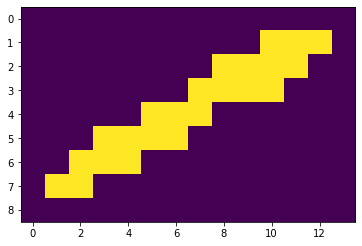

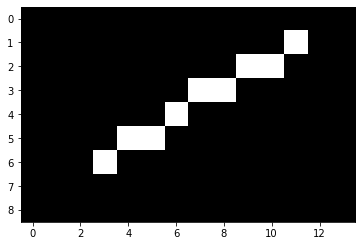

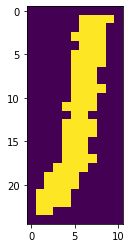

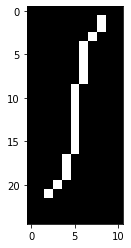

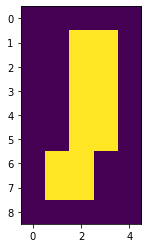

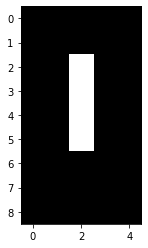

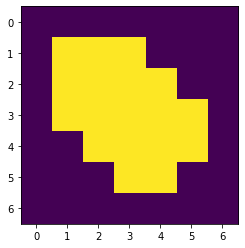

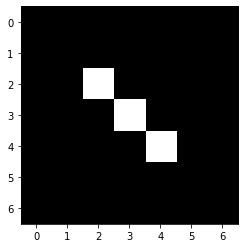

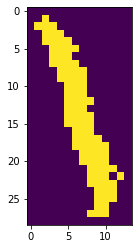

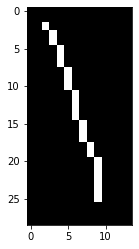

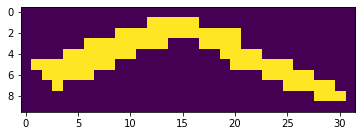

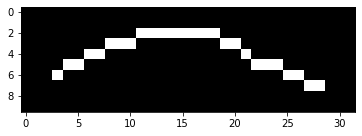

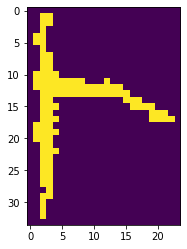

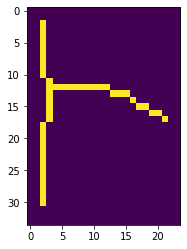

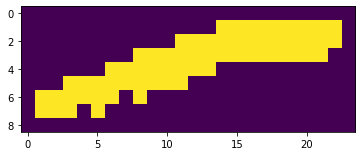

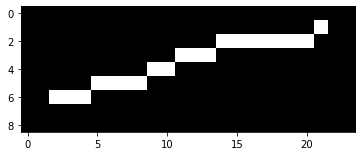

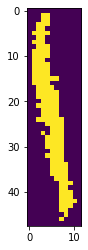

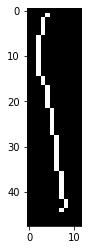

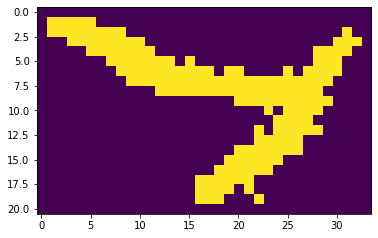

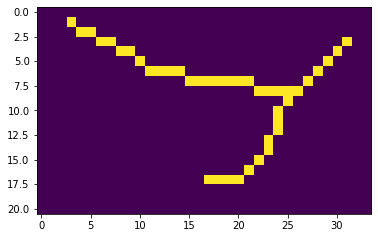

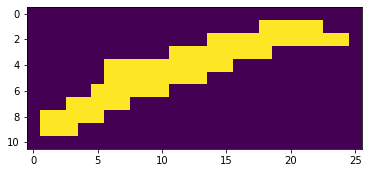

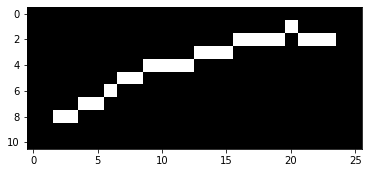

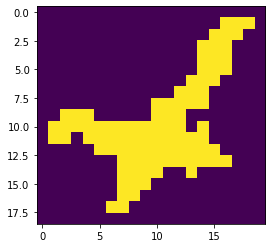

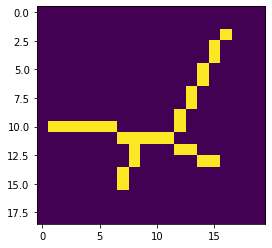

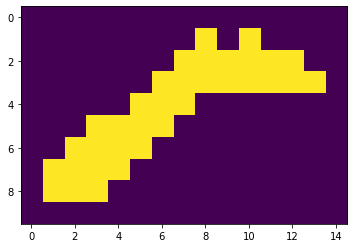

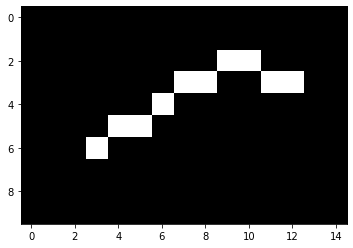

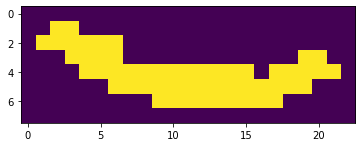

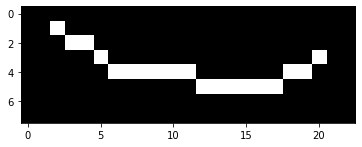

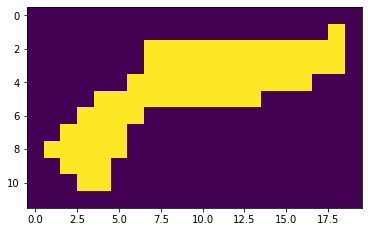

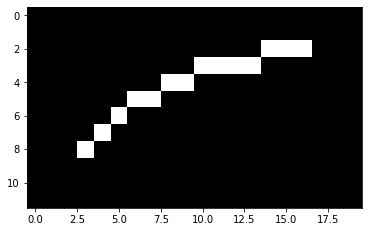

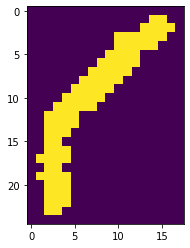

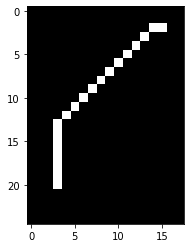

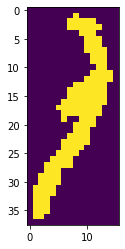

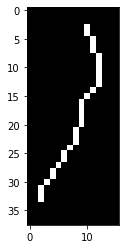

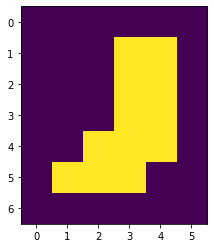

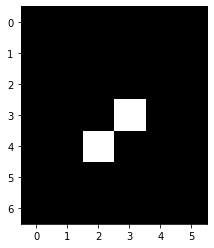

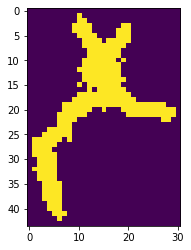

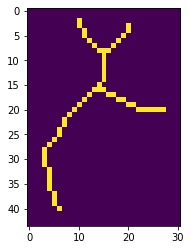

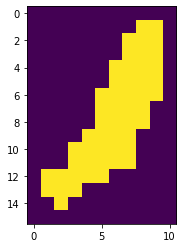

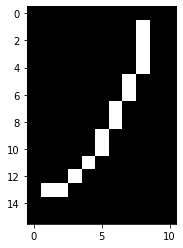

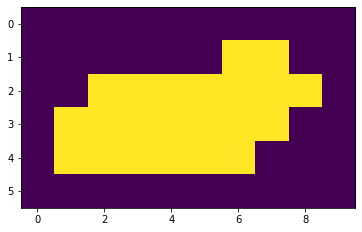

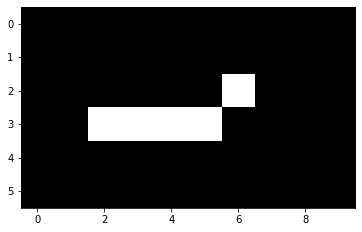

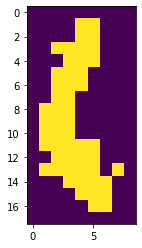

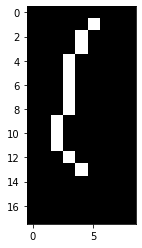

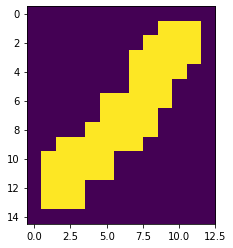

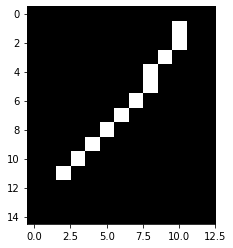

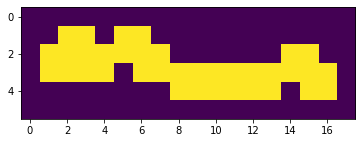

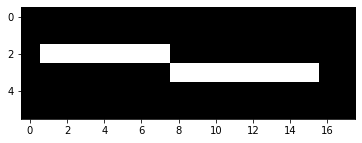

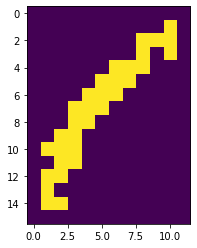

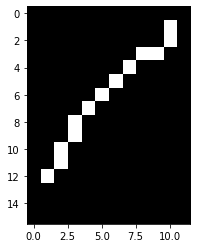

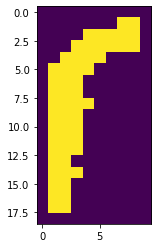

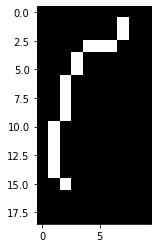

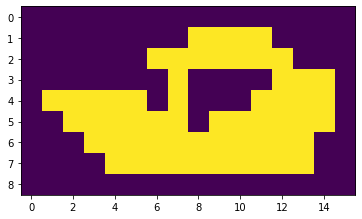

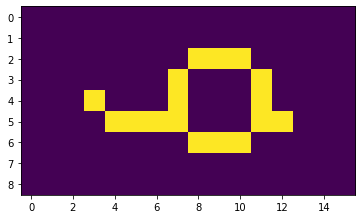

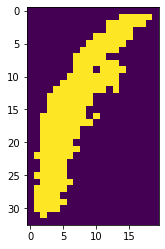

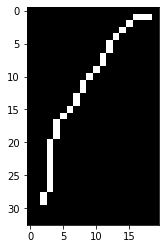

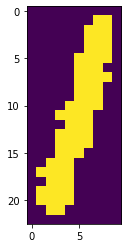

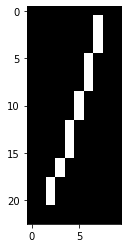

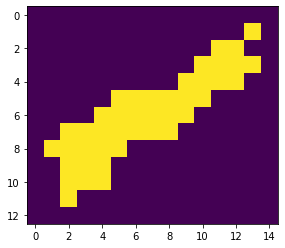

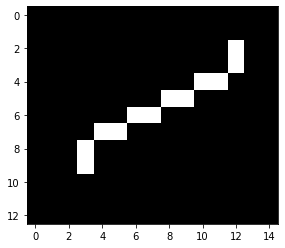

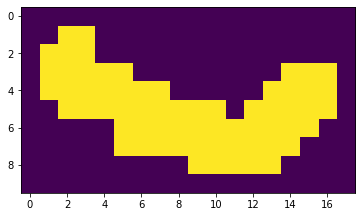

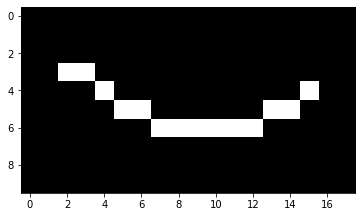

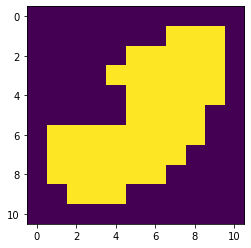

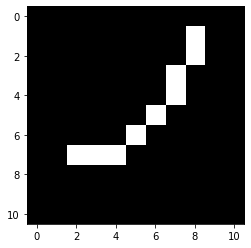

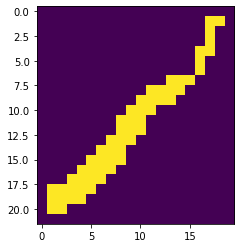

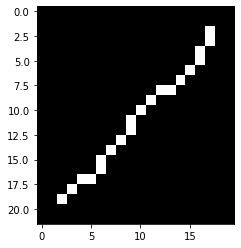

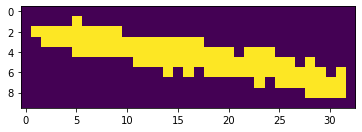

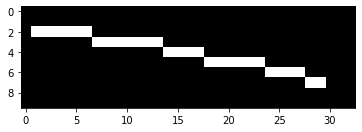

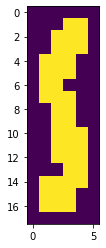

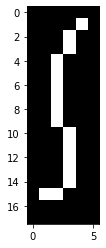

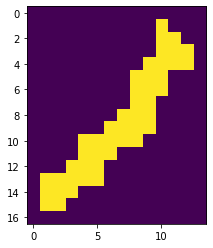

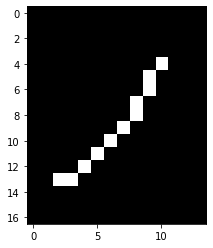

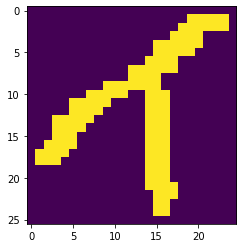

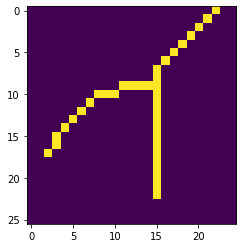

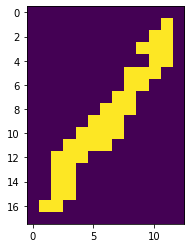

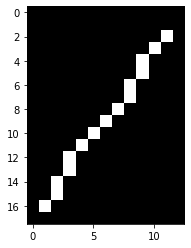

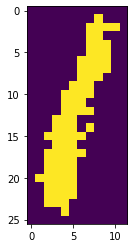

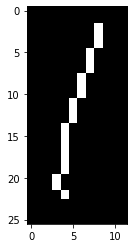

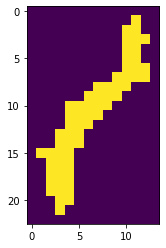

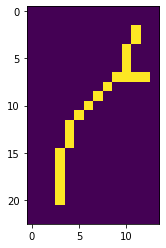

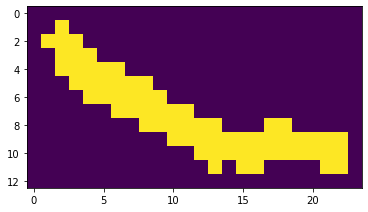

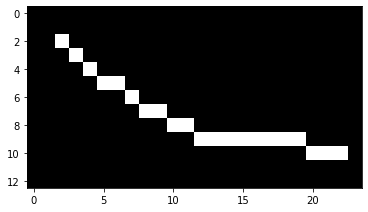

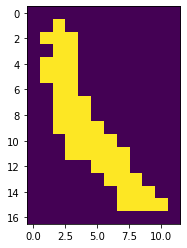

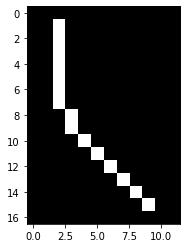

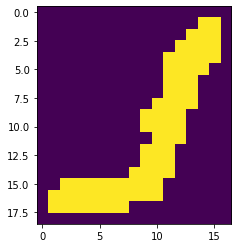

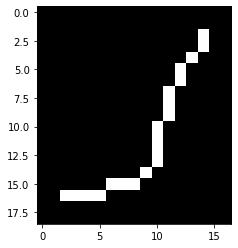

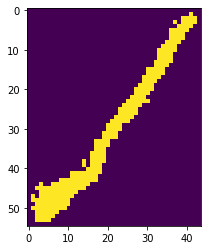

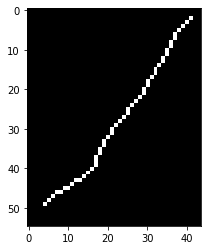

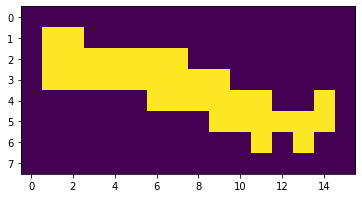

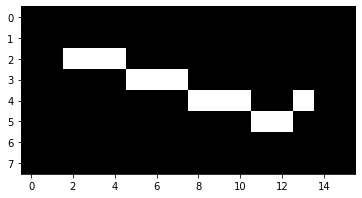

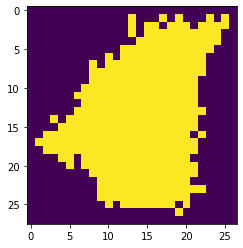

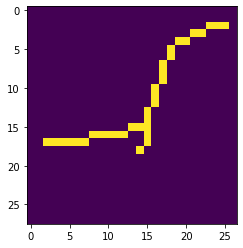

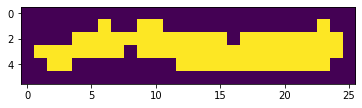

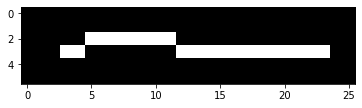

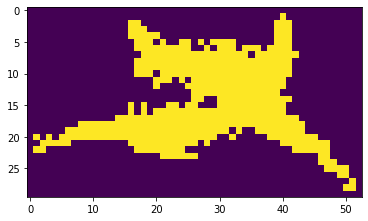

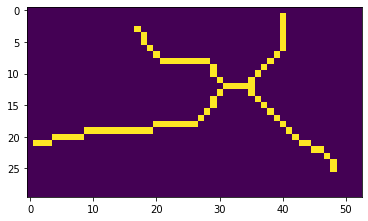

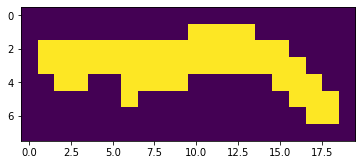

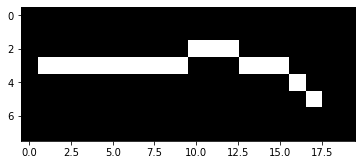

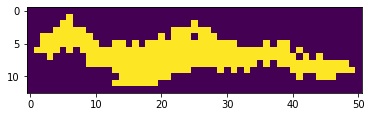

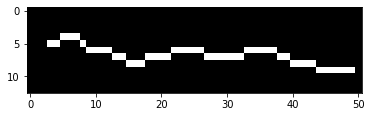

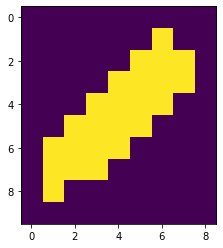

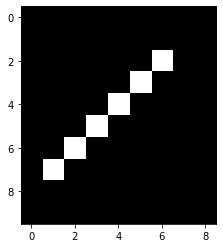

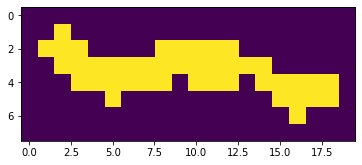

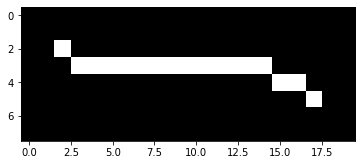

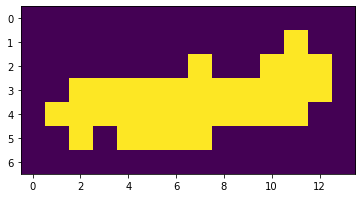

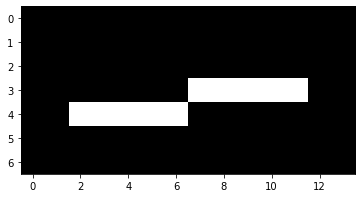

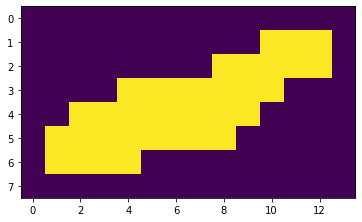

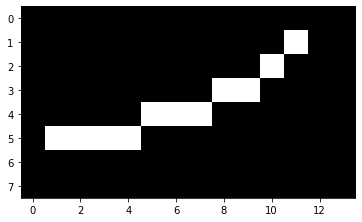

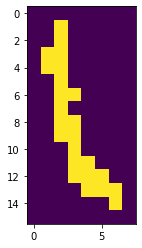

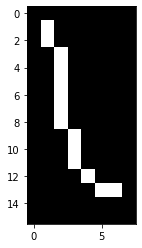

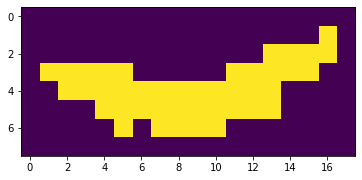

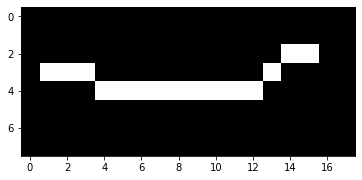

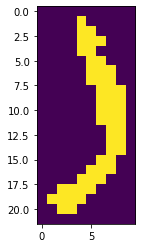

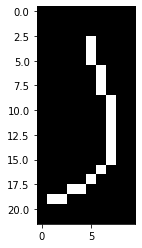

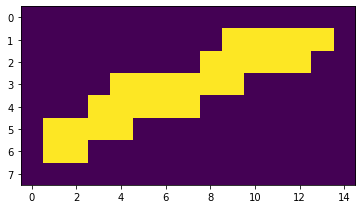

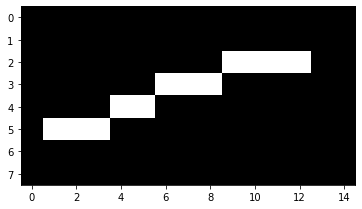

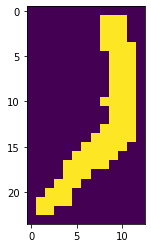

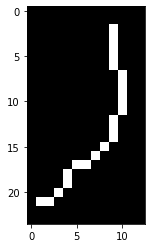

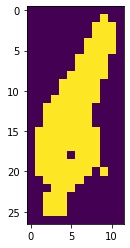

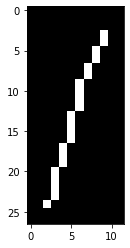

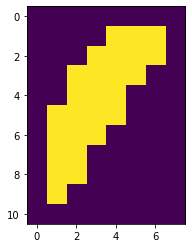

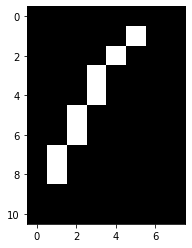

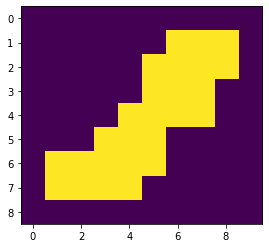

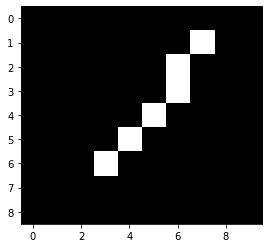

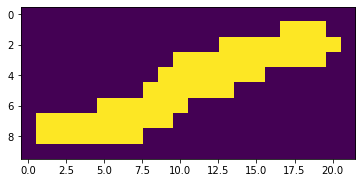

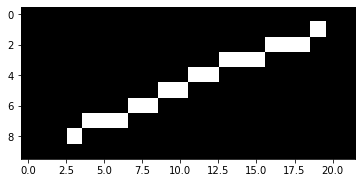

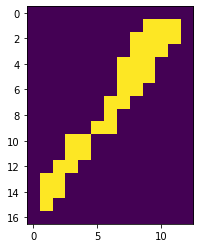

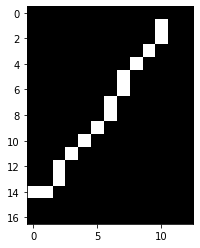

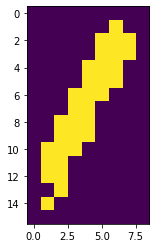

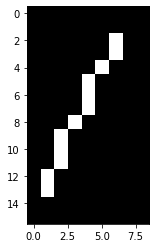

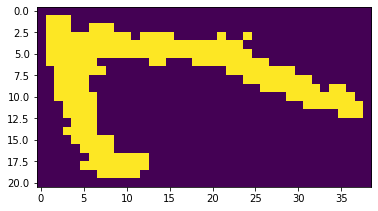

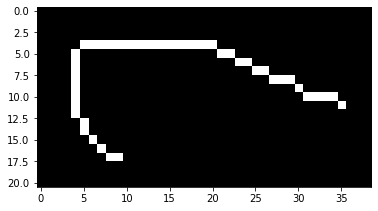

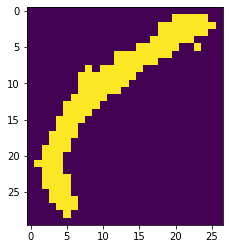

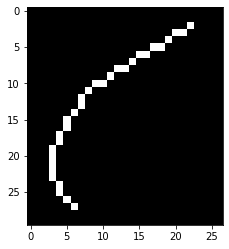

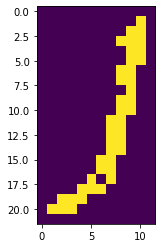

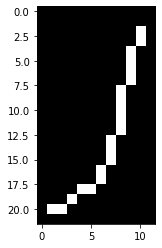

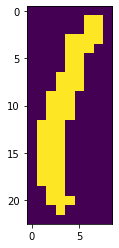

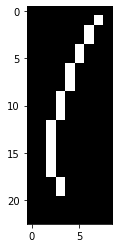

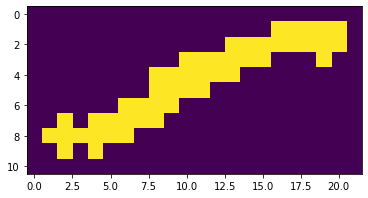

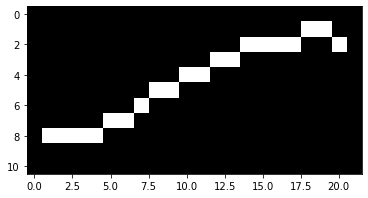

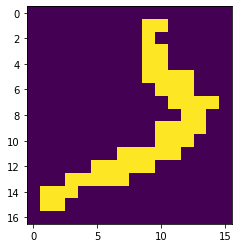

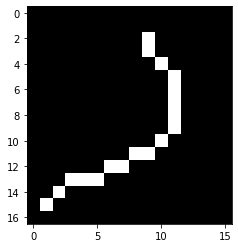

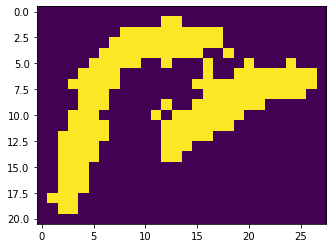

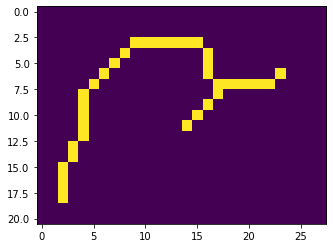

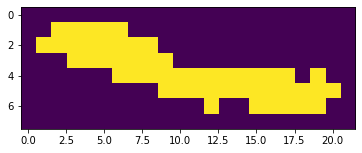

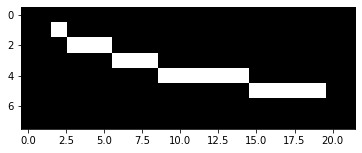

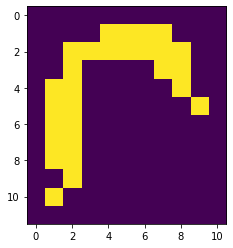

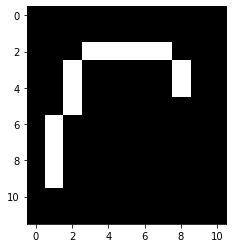

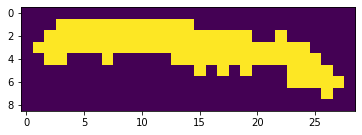

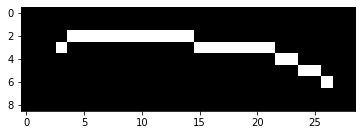

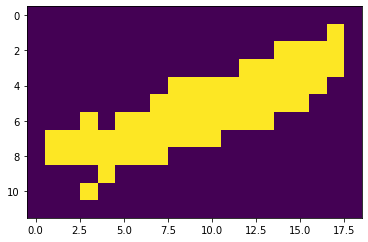

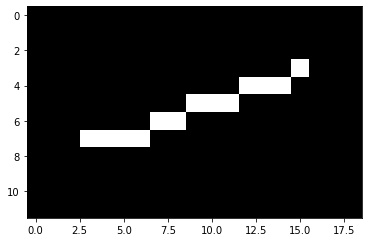

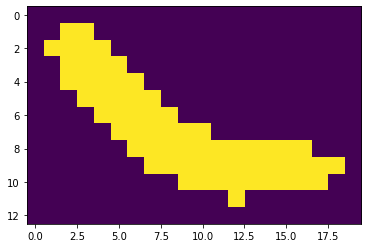

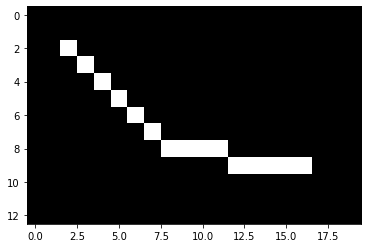

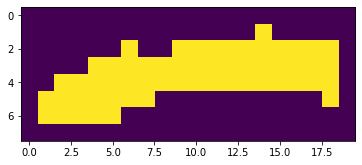

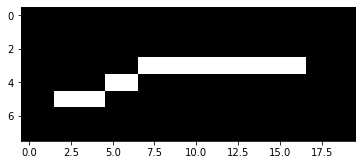

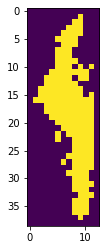

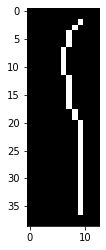

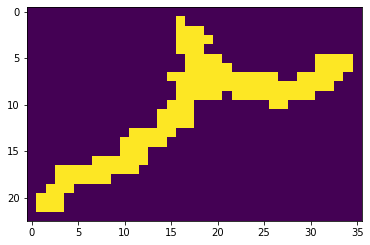

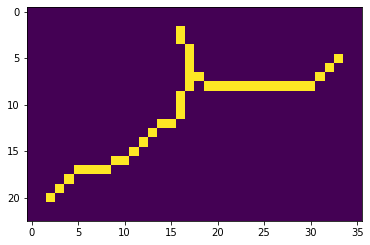

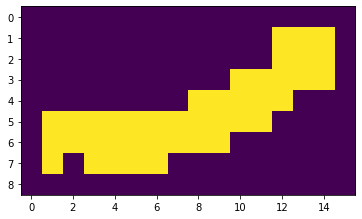

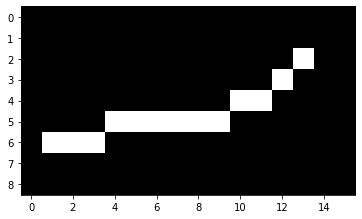

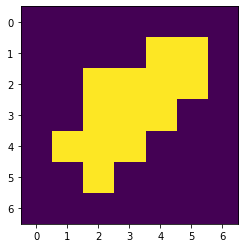

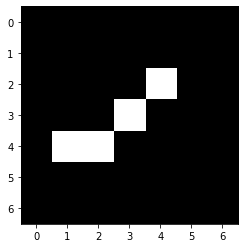

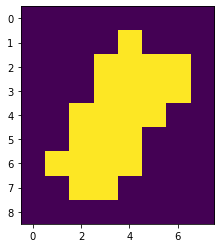

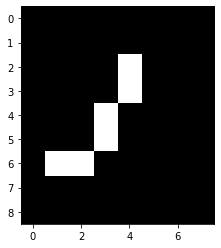

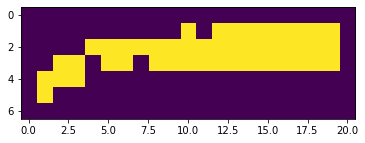

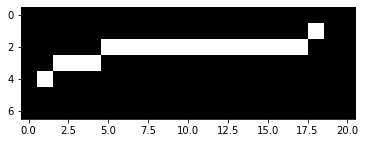

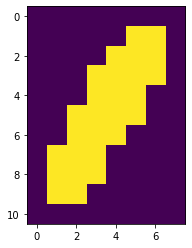

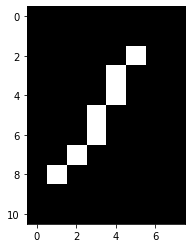

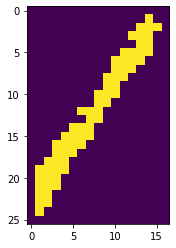

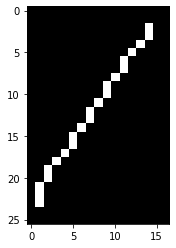

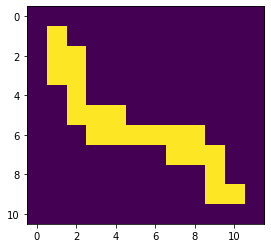

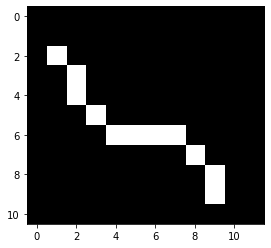

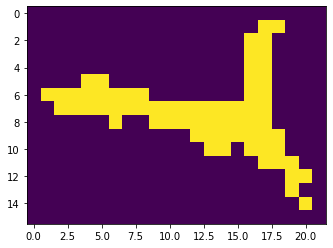

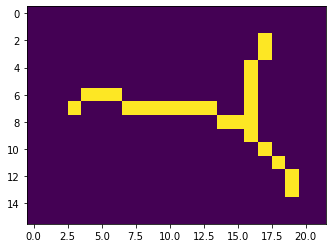

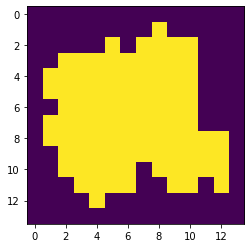

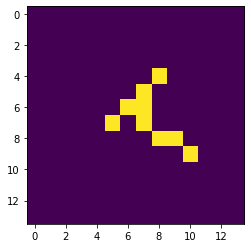

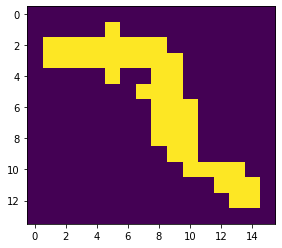

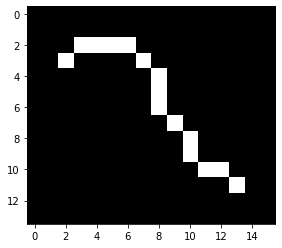

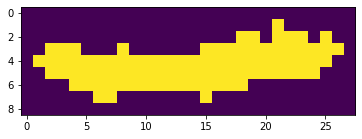

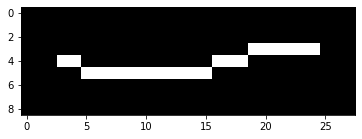

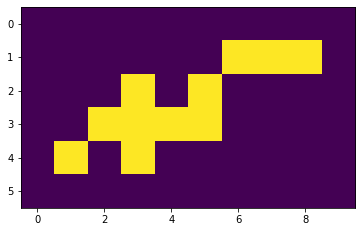

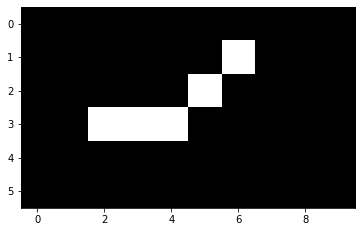

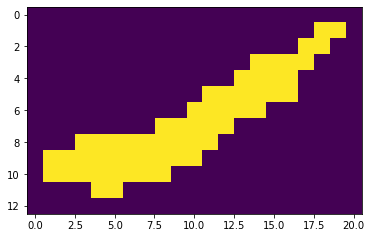

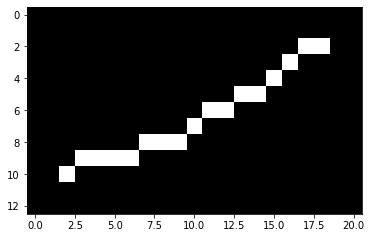

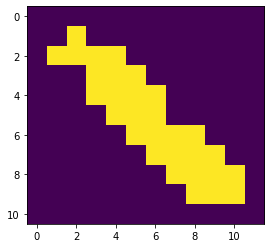

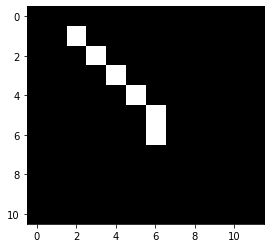

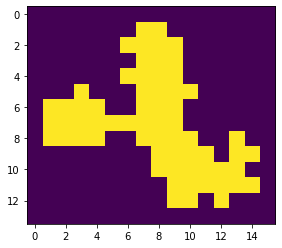

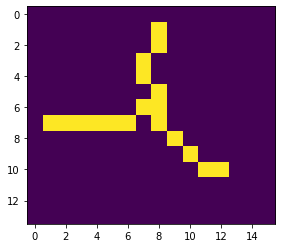

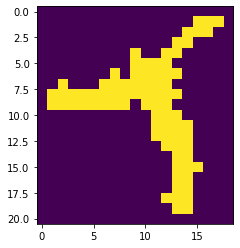

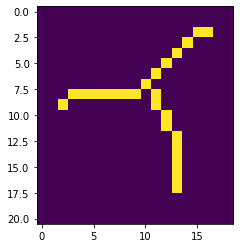

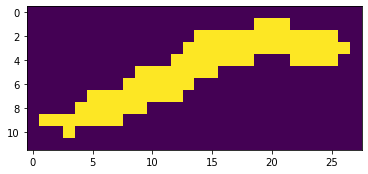

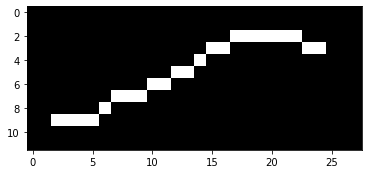

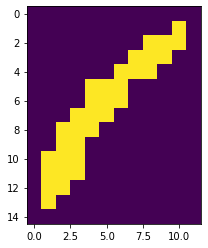

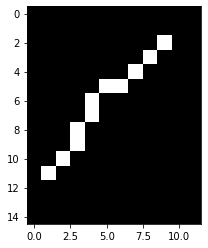

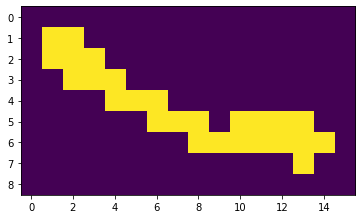

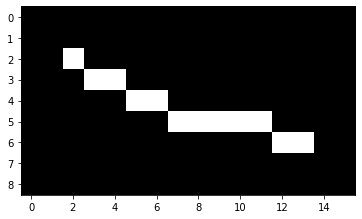

In [16]:
non_branched_tubes = []

for tube in tube_lists:

    plt.imshow(pad_image(tube.image))
    plt.show()
    
    blurred = gaussian(pad_image(tube.image))
    candidate = skeletonize(blurred > blurred.mean())
    
    if checker(candidate):
        plt.imshow(candidate)
        plt.show()
    else:
        non_branched_tubes.append(tube)
        plt.imshow(candidate, cmap = "gray")
        plt.show()

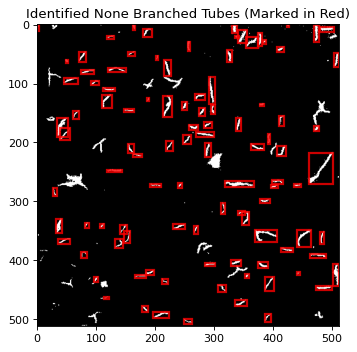

In [17]:
fig = plt.figure(figsize=(5, 5), dpi = 80)

ax = plt.subplot(1, 1, 1)
plt.title("Identified None Branched Tubes (Marked in Red)")
ax.imshow(binary, cmap="gray")
for i in non_branched_tubes:
    minr, minc, maxr, maxc = i.bbox
    rect = plt.Rectangle((minc, minr), maxc - minc, maxr - minr,
                              fill=False, edgecolor='red', linewidth=2, alpha=.8)
    ax.add_patch(rect)
    
plt.show()

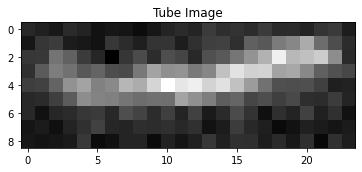

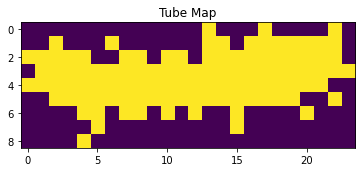

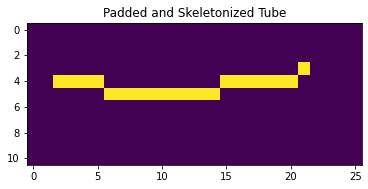

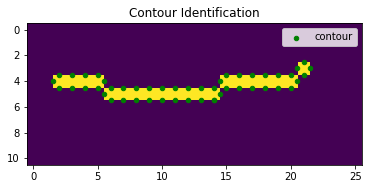

In [28]:
tube = tube_lists[6]

minr, minc, maxr, maxc = tube.bbox

plt.title("Tube Image")
plt.imshow(img2[minr:maxr, minc:maxc], cmap = "gray")
plt.show()

plt.title("Tube Map")
plt.imshow(tube.image)
plt.show()

blurred = gaussian(pad_image(tube.image))
candidate = skeletonize(blurred > blurred.mean())

plt.title("Padded and Skeletonized Tube")
plt.imshow(candidate)
plt.show()

contours = find_contours(candidate, .5, fully_connected = 'high')

plt.title("Contour Identification")
plt.imshow(candidate)
for contour in contours:
    plt.scatter(contour[:, 1], contour[:, 0], s=20, color = "green", label = 'contour')
plt.legend()
plt.show()


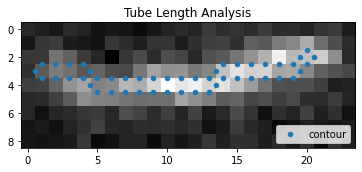

In [33]:
plt.title("Tube Length Analysis")
plt.imshow(img2[minr:maxr, minc:maxc], cmap = "gray")
for contour in contours:
    plt.scatter(contour[:, 1]-1, contour[:, 0]-1, s=20, label = 'contour')
plt.legend(loc=4)
plt.show()

## Extract seeds

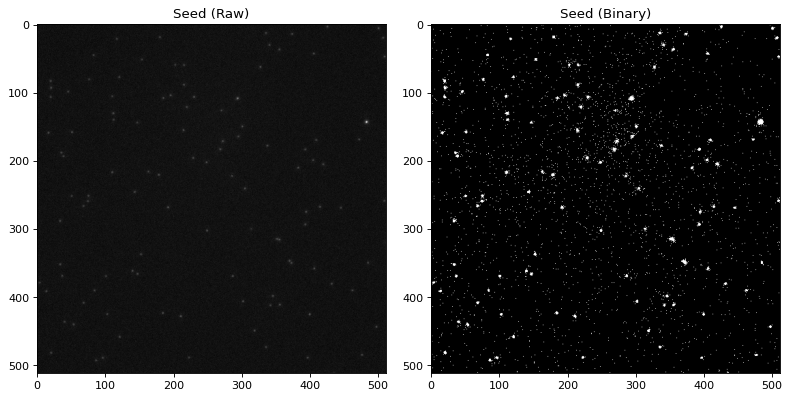

In [34]:
binary = img1 > (img1.mean() + 2*img1.std())

fig = plt.figure(figsize=(10, 5), dpi = 80)

plt.subplot(1, 2, 1)
plt.title("Seed (Raw)")
plt.imshow(img1, cmap="gray")

plt.subplot(1, 2, 2)
plt.title("Seed (Binary)")
plt.imshow(binary, cmap="gray")

plt.tight_layout()
plt.show()

In [40]:
# use labeling function to identify connected blobs
label_im = label(binary)
seed_lists = regionprops(label_im)
seed_lists = [i for i in seed_lists if i.area > 10]
seed_map = np.zeros_like(binary)

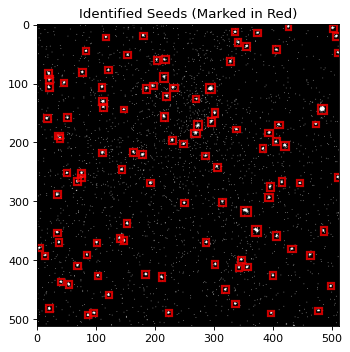

In [41]:
fig = plt.figure(figsize=(5, 5), dpi = 80)

ax = plt.subplot(1, 1, 1)
plt.title("Identified Seeds (Marked in Red)")
ax.imshow(binary, cmap="gray")
for i in seed_lists:
    minr, minc, maxr, maxc = i.bbox
    seed_map[minr:maxr, minc:maxc] = 1
    rect = plt.Rectangle((minc - 3, minr - 3), maxc - minc + 6, maxr - minr + 6,
                              fill=False, edgecolor='red', linewidth=2, alpha=.8)
    ax.add_patch(rect)
    
plt.show()

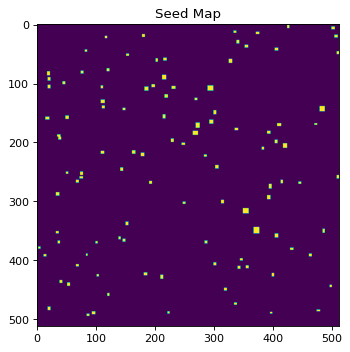

In [43]:
fig = plt.figure(figsize=(5, 5), dpi = 80)

plt.title("Seed Map")
plt.imshow(seed_map)
plt.show()

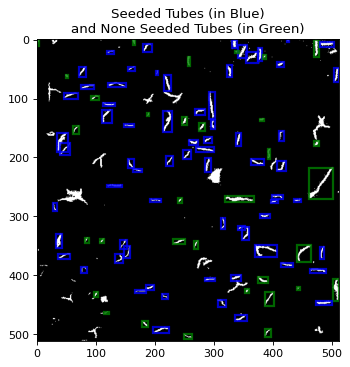

In [50]:
fig = plt.figure(figsize=(5, 5), dpi = 80)

ax = plt.subplot(1, 1, 1)
plt.title("Seeded Tubes (in Blue)\nand None Seeded Tubes (in Green)")
ax.imshow(img2 > (img2.mean() + 2*img2.std()), cmap="gray")
for i in non_branched_tubes:
    minr, minc, maxr, maxc = i.bbox
    if np.sum(seed_map[minr:maxr, minc:maxc]) > 0:
        rect = plt.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                  fill=False, edgecolor='blue', linewidth=2, alpha=.8)
    else:
        rect = plt.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                  fill=False, edgecolor='green', linewidth=2, alpha=.8)
    ax.add_patch(rect)
    
plt.show()

In [51]:
def pad_image(image):
    padded = np.zeros(shape=(image.shape[0]+2, image.shape[1]+2), dtype = np.uint16)
    padded[1:image.shape[0]+1, 1:image.shape[1]+1] = image
    return padded

def dist(x1, y1, x2, y2):
    return np.sqrt((x1-x2)**2+(y1-y2)**2)

def contour_length(data):
    val = 0
    for i in range(len(data)):
        if i != len(data) - 1:
            val += dist(data[i, 0], data[i, 1], data[i+1, 0], data[i+1, 1])
    return (val/2) # 1 pixel = 0.17 um

def tube_length_analysis(tube):
    
    blurred = gaussian(pad_image(tube.image))
    
    candidate = skeletonize(blurred > blurred.mean())
    
    contours = find_contours(candidate, .5, fully_connected = 'high')
    
    val = 0
    
    for contour in contours:
        val += contour_length(contour)
        
    return val

In [52]:
ctr, data_id, data_lengths, data_seeded = 0, [], [], []
for tube in non_branched_tubes:
    minr, minc, maxr, maxc = tube.bbox
    if np.sum(seed_map[minr:maxr, minc:maxc]) > 0:
        data_seeded.append(True)
    else:
        data_seeded.append(False)
    data_id.append(ctr)
    ctr+=1
    data_lengths.append(tube_length_analysis(tube))

In [55]:
df = pd.DataFrame({"tube id": data_id,
              "total lenghts (px)": data_lengths,
              "total lenghts ($\mu$m)": [i*0.17 for i in data_lengths],
              "seeded": data_seeded})

df.head(10)

,tube id,total lenghts (px),total lenghts ($\mu$m),seeded
0,0,9.828427,1.670833,False
1,1,6.828427,1.160833,False
2,2,16.071068,2.732082,True
3,3,2.414214,0.410416,True
4,4,27.071068,4.602082,False
5,5,21.656854,3.681665,True
6,6,19.727922,3.353747,True
7,7,26.384776,4.485412,True
8,8,22.485281,3.822498,True
9,9,11.656854,1.981665,True


In [72]:
df

,tube id,total lenghts (px),total lenghts ($\mu$m),seeded
0,0,9.828427,1.670833,False
1,1,6.828427,1.160833,False
2,2,16.071068,2.732082,True
3,3,2.414214,0.410416,True
4,4,27.071068,4.602082,False
...,...,...,...,...
96,96,20.727922,3.523747,True
97,97,8.071068,1.372082,False
98,98,26.727922,4.543747,True
99,99,14.313708,2.433330,False


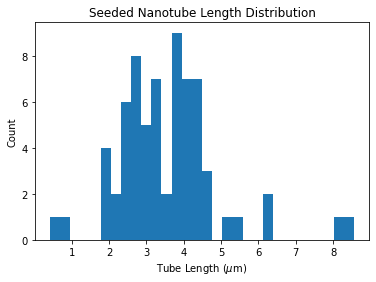

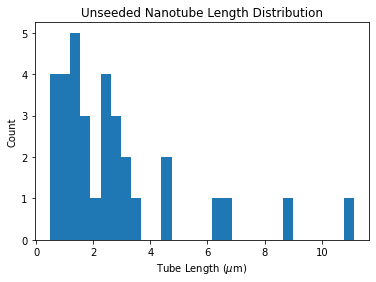

In [71]:
plt.hist(df[df["seeded"]==True]['total lenghts ($\mu$m)'].values, bins = 30)
plt.title("Seeded Nanotube Length Distribution")
plt.ylabel("Count")
plt.xlabel("Tube Length ($\mu$m)")
plt.show()

plt.hist(df[df["seeded"]==False]['total lenghts ($\mu$m)'].values, bins = 30)
plt.title("Unseeded Nanotube Length Distribution")
plt.ylabel("Count")
plt.xlabel("Tube Length ($\mu$m)")
plt.show()

In [ ]:
figure = plt.figure(figsize=(15, 5), dpi = 80)

plt.subplot(1, 3, 1)
plt.title("Tube Image (Contrast Stretching)")
p2, p98 = np.percentile(img2, (2, 98))
img_rescale = rescale_intensity(img2, in_range=(p2, p98))
plt.imshow(img_rescale, cmap = "gray")
plt.axis(False)

plt.subplot(1, 3, 2)
plt.title("Tube Image (Binary)")
plt.imshow(binary, cmap = "gray")
plt.axis(False)

ax = plt.subplot(1, 3, 3)
plt.title("Identified Tubes (Marked in Red)")
ax.imshow(binary, cmap="gray")
for i in tube_lists:
    minr, minc, maxr, maxc = i.bbox
    tube_map[minr:maxr, minc:maxc]=1
    rect = plt.Rectangle((minc, minr), maxc - minc, maxr - minr,
                              fill=False, edgecolor='red', linewidth=2, alpha=.8)
    ax.add_patch(rect)
plt.axis(False)
    
plt.tight_layout()
plt.show()

## Measure Tube

In [ ]:
from skimage.morphology import skeletonize
from skimage.measure import find_contours

tube = tube_lists[16]

minr, minc, maxr, maxc = tube.bbox

cropped = img2[minr:maxr, minc:maxc]

fig = plt.figure(figsize=(8, 15), dpi = 100)

plt.subplot(1,3,1)
plt.imshow(cropped, cmap = "gray")

skeleton = skeletonize(tube.image)

plt.subplot(1,3,2)
plt.imshow(skeleton, cmap = "gray")

contours = find_contours(skeleton, .5, fully_connected = 'high')

plt.subplot(1, 3, 3)
plt.imshow(cropped, cmap = "gray")

for contour in contours:
    plt.scatter(contour[:, 1], contour[:, 0], s=15)
    
plt.tight_layout()
plt.show()

In [ ]:
contour_length(contour)

## Fix issues with padding

In [ ]:
tube = tube_lists[0]

minr, minc, maxr, maxc = tube.bbox

cropped = img2[minr:maxr, minc:maxc]

fig = plt.figure(figsize=(8, 15), dpi = 100)

plt.subplot(1,3,1)
plt.imshow(cropped, cmap = "gray")

skeleton = skeletonize(tube.image)

plt.subplot(1,3,2)
plt.imshow(skeleton, cmap = "gray")

contours = find_contours(skeleton, .5, fully_connected = 'high')

plt.subplot(1, 3, 3)
plt.imshow(cropped, cmap = "gray")

for contour in contours:
    plt.scatter(contour[:, 1], contour[:, 0], s=15)
    
plt.tight_layout()
plt.show()

In [ ]:
tube = tube_lists[0]

minr, minc, maxr, maxc = tube.bbox

cropped = img2[minr:maxr, minc:maxc]

fig = plt.figure(figsize=(8, 15), dpi = 100)

plt.subplot(1,3,1)
plt.imshow(pad_image(cropped), cmap = "gray")

skeleton = skeletonize(pad_image(tube.image))

plt.subplot(1,3,2)
plt.imshow(skeleton, cmap = "gray")

contours = find_contours(skeleton, .5, fully_connected = 'high')

plt.subplot(1, 3, 3)
plt.imshow(pad_image(cropped), cmap = "gray")

for contour in contours:
    plt.scatter(contour[:, 1], contour[:, 0], s=15)
    
plt.tight_layout()
plt.show()

In [ ]:
lengths = []

for tube in tube_lists:
    lengths.append(tube_length_analysis(tube))
    
lengths = np.array(lengths)

fig = plt.figure(figsize=(13, 4), dpi = 80)

ax = plt.subplot(1, 3, 1)
plt.title("Identified Tubes (Marked in Red)")
ax.imshow(binary, cmap="gray")
for i in tube_lists:
    minr, minc, maxr, maxc = i.bbox
    tube_map[minr:maxr, minc:maxc]=1
    rect = plt.Rectangle((minc, minr), maxc - minc, maxr - minr,
                              fill=False, edgecolor='red', linewidth=2, alpha=.8)
    ax.add_patch(rect)
plt.axis(False)

plt.subplot(1, 3, 2)
plt.title("Length Distribution (in pixel)")
plt.hist(lengths, bins = 30)
plt.xlabel("pixels")
plt.ylabel("counts")

plt.subplot(1, 3, 3)
plt.title("Length Distribution (in $\mu$m)")
plt.hist(lengths*0.17, bins = 30)
plt.xlabel("$\mu$m")
# plt.ylabel("counts")

plt.tight_layout()
plt.show()